<a href="https://colab.research.google.com/github/tnattawat/Coursera_Capstone/blob/main/Battle_of_Neighborhoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1 align=center><font size=6>Battle of Neighborhoods</font></h></b>
<h1 align=center><font size=5>The Best Location for New Thai Restaurant in Singapore</font></h>

### Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#scrollTo=Nzw4qxI5eJxt&line=1&uniqifier=1">Business Problem</a>

2.  <a href="#scrollTo=2bzdq2sNYvHV&line=1&uniqifier=1">Data</a>

3.  <a href="#scrollTo=wyrCj808qbVw&line=1&uniqifier=1">Methodology</a>

4.  <a href="#scrollTo=dWVKjTIhFAQG&line=1&uniqifier=1">Result & Discussion</a>

5.  <a href="#scrollTo=KogangYmH2z6&line=1&uniqifier=1">Conclusion</a>  
    </font>
    </div>

## 1. Business Problem

Lord Anantara is an ambitious food entrepreneur from Thailand. He is planning to open his first restaurant overseas in Singapore. He is looking for a location with high traffic of customers and low competition of restaurants. The unconvenient truth is locations with high demand are often already crowded by existing restaurants with cutthroat competition. Location with low competition that still offers high demand is a gem and is a key success factor for Lord Ananatara's restaurant. The challenge is finding it.

Lord Anantara decided to hire Topp, a charming data scientist, to conduct a location analysis and recommend him the best location. Topp is tasked to use his data science prowess to generate the most promissing neighborhood option(s) that can satisfy Lord Anantara's criteria, along with a clear explanation of their advantages and disadvantages.

Below is Topp's notebook detailing the process he carried out to find the best food store location for Lord Anantara.

## 2. Data

### Data source and how it will be used to solve the problem

Based on definition of our problem, factors that will influence our decision are:
* total number of restaurants in the neighborhood, which is a proxy for food demand.
* most common types of restaurants in the neighborhood, as their numbers reflect the level of supply and general competition in food business.
* number of existing Thai restaurants in the neighborhood, which reflects the specific competition for Thai cuisine.

Following data sources will be needed to extract and/or generate the required information:
* list of candidate neighborhoods will be scraped from **Wikipedia**
* coordinates of each neighborhood will be generated using **arcGIS API**
* information on restaurants in each neighborhood will be obtained using **Foursquare API**

Using these datasets, our charming data scientist Topp will explore, segment, and cluster the different neighborhoods in Singapore. He will scrape a list of candidate neighborhoods from Wikiepdia, extract their coordinates from arcGIS, and use Foursquare API to explore the different neighborhoods in the city of Singapore. Specifically, he will analyze the total number of restaurants, the most common types of restaurants and the number of existing Thai restaurants for each neighborhood. Then, he will use this analysis to group the neighborhoods into clusters with K-means clustering algorithm. Also, he will use Folium library to visualize the neighborhoods and their clusters. Finally, he will make a recommendation as to where would be the best store location for Lord Anantara in Singapore.

## 3. Methodology


In this notebook, we will identify neighborhoods in Singapore that have high demand and low supply (competition). We will make a thorough analysis of the entire country of Singapore and find the 'hidden gem' for Lord Anantara.


In the first step we will collect data **list and location values of neighborhoods**. We will also obtain data on **different types of restaurants within 500 meters from each neighborhood center** (according to Foursquare categorization).

Second step in to analyze the **numbers of different types of restaurants for each neighborhood** with a particular attention to Thai restaurants, and also identify the **most common types of restaurants** in all areas of Singapore.

In the third, we will use the above analysis to group all areas into clusters with **K-means clustering algorithm**. Then, we will use **Folium map visualization** library to visualize the neighborhoods and their clusters. We will use the resulting clusters to identify the most promising neighborhoods.

Finally, we will discuss the resulting options of neighborhoods against Lord Anantara's criteria and make a recommendation as to where would be the best store location in Singapore.

### Import libraries

Before we get the data and start exploring it, let's download all the libraries and modules that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geocoder
import geocoder 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Data of candidates neighborhoods

#### Obtain list of neighborhoods

Let's first obtain a list of neighborhoods in Singapore.

There is a Wikipedia page containing a table of neighborhoods in Singapore and their postal codes. We can use pandas to read the table into dataframe.

In [2]:
# read table from Wikipedia into dataframe
geo = pd.read_html("https://en.wikipedia.org/wiki/Postal_codes_in_Singapore")

# take a quick look at the dataset
geo

[    Postal district Postal sector(1st 2 digits of 6-digit postal codes)  \
 0                 1                             01, 02, 03, 04, 05, 06    
 1                 2                                             07, 08    
 2                 3                                         14, 15, 16    
 3                 4                                             09, 10    
 4                 5                                         11, 12, 13    
 5                 6                                                 17    
 6                 7                                             18, 19    
 7                 8                                             20, 21    
 8                 9                                             22, 23    
 9                10                                     24, 25, 26, 27    
 10               11                                         28, 29, 30    
 11               12                                         31, 32, 33    
 12         

We can see that the dataset includes postal district, postal sector, and general location. For our purpose, we will need only postal district and general location (i.e. neighborhood). Let's define a new variable.

In [3]:
# select only postal district and general locatiom
sg_df = geo[0][['Postal district', 'General location']]

# take a quick look
sg_df

,Postal district,General location
0,1,"Raffles Place, Cecil, Marina, People's Park"
1,2,"Anson, Tanjong Pagar"
2,3,"Bukit Merah, Queenstown, Tiong Bahru"
3,4,"Telok Blangah, Harbourfront"
4,5,"Pasir Panjang, Hong Leong Garden, Clementi New..."
5,6,"High Street, Beach Road (part)"
6,7,"Middle Road, Golden Mile"
7,8,"Little India, Farrer Park, Jalan Besar, Lavender"
8,9,"Orchard, Cairnhill, River Valley"
9,10,"Ardmore, Bukit Timah, Holland Road, Tanglin"


Because the original data grouped different neighborhoods by postal district, many of the rows are containing more than one locations. We will transform it into a clean list, in which each row contains only one neighborhood. 

In [4]:
# transform dataframe so that each row contain only one neighborhood
sg_df['General location'] = sg_df['General location'].str.split(',')
sg_df = sg_df.explode('General location').reset_index(drop=True)

# rename the dataframe columns
sg_df.columns = ['District', 'Neighborhood']
sg_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,District,Neighborhood
0,1,Raffles Place
1,1,Cecil
2,1,Marina
3,1,People's Park
4,2,Anson
...,...,...
74,26,Springleaf
75,27,Yishun
76,27,Sembawang
77,27,Senoko


The new dataframe contains a total of 79 neighborhoods all across Singapore.

#### Obtain location values of neighborhoods

The next task is to obtain latitudes and longitude coordinates for each of the neighborhoods. We will use a geocoder library and arcGIS API.

In [5]:
# obtain latitude & longitude
latitude=[]
longitude=[]

for locat in sg_df['Neighborhood']:
    g = geocoder.arcgis('{}, Singapore'.format(locat))
    latlng = g.latlng
    latitude.append(latlng[0])
    longitude.append(latlng[1])

In [6]:
# add latitude & longitude to the dataframe
sg_df['Latitude'] = latitude
sg_df['Longitude'] = longitude

In [7]:
# Quickly examine the resulting dataframe.
print(sg_df.head(), '\n')
print(sg_df.info())

   District    Neighborhood  Latitude  Longitude
0         1   Raffles Place   1.28189  103.84912
1         1           Cecil   1.29041  103.85211
2         1          Marina   1.29285  103.76272
3         1   People's Park   1.28444  103.84194
4         2           Anson   1.29041  103.85211 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   District      79 non-null     int64  
 1   Neighborhood  79 non-null     object 
 2   Latitude      79 non-null     float64
 3   Longitude     79 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.6+ KB
None


The dataframe now contains 79 neighborhoods along with their coordinates. The datatypes are also apprioriate for further manipulation and analysis. For instance, the datatype for latitudes and longitudes is float.

#### Visualize the neigborhoods

Create a map of Singapore with the neighborhoods superimposed on top.

Use geopy library to get the latitude and longitude values of the city of Singapore.


In [8]:
# set up am instance for Singapore
address = 'Singapore'
geolocator = Nominatim(user_agent="sg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Coordinate of Singapore is {}, {}.'.format(latitude, longitude))

# create map of Singapore using latitude and longtitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=12)

Coordinate of Singapore is 1.357107, 103.8194992.


In [9]:
# add markers of neighborhoods to map
for lat, lng, neighbor in zip(sg_df['Latitude'], sg_df['Longitude'], sg_df['Neighborhood']):
    label = folium.Popup(neighbor, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=1).add_to(map_sg)
    
map_sg

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

### Data of restaurants

#### Extract data on the venues in each neighborhood using Foursquare API


Define Foursquare Credentials and Version


In [10]:
CLIENT_ID = '0M2CZMQF5ZZWZAFNTDO35XDVQXSLEKTYWYZV1VXGLEHP44Y5' # Foursquare ID
CLIENT_SECRET = 'DXDV2E2PMDV44UOZXOAV30AHQBQRZHLKAOP5ENHCVOXMQIZ3' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0M2CZMQF5ZZWZAFNTDO35XDVQXSLEKTYWYZV1VXGLEHP44Y5
CLIENT_SECRET:DXDV2E2PMDV44UOZXOAV30AHQBQRZHLKAOP5ENHCVOXMQIZ3


We will use our location coordinates to obtain information on venues in each neighborhood using Foursquare API.

In [11]:
# Get the neighborhood's name
neighbor_name = sg_df.loc[0, 'Neighborhood']
neighbor_name

'Raffles Place'

In [12]:
# Get the neighborhood's latitude and longitude values
neighbor_lat = sg_df.loc[0, 'Latitude']
neighbor_lng = sg_df.loc[0, 'Longitude']

print('Latitude and longitude values of {} are {}, {}.'.format(neighbor_name, 
                                                               neighbor_lat, 
                                                               neighbor_lng))

Latitude and longitude values of Raffles Place are 1.2818900000000326, 103.84912000000008.


Now, let's get the top 100 venues that are within a radius of 500 meters from Raffles Place.

In [13]:
LIMIT = 100 # limit number of venues returned
RADIUS = 500 # define redius

# create url
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,
    neighbor_lat, 
    neighbor_lng, 
    VERSION,
    RADIUS, 
    LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=0M2CZMQF5ZZWZAFNTDO35XDVQXSLEKTYWYZV1VXGLEHP44Y5&client_secret=DXDV2E2PMDV44UOZXOAV30AHQBQRZHLKAOP5ENHCVOXMQIZ3&ll=1.2818900000000326,103.84912000000008&v=20180605&radius=500&limit=100'

Send the GET request and examine the resutls


In [14]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ff1c8b2da8249517fe550b4'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-519d916f498ea9ac42f23088-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1fa931735',
         'name': 'Hotel',
         'pluralName': 'Hotels',
         'primary': True,
         'shortName': 'Hotel'}],
       'id': '519d916f498ea9ac42f23088',
       'location': {'address': '76 Telok Ayer St, Singapore 048464',
        'cc': 'SG',
        'country': 'Singapore',
        'distance': 151,
        'formattedAddress': ['76 Telok Ayer St, Singapore 048464',
         'Singapore'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 1.2831183226093794,
          'lng': 103.848538

### Data preparation

Looking at the result, we can see that all the relevant information is in the items key. Let's define a function to extract the category of the venue.

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.


In [16]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Amoy Hotel,Hotel,1.283118,103.848539
1,Luke's Oyster Bar & Chop House,Seafood Restaurant,1.282459,103.847240
2,Grain Traders,Restaurant,1.281468,103.850039
3,Lau Pa Sat Satay Street,Street Food Gathering,1.280261,103.850235
4,Freehouse,Beer Garden,1.281254,103.848513


Check the number of venues returned by Foursquare.

In [17]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


Filer for only restaurants

In [18]:
# filter for only restaurant
nearby_df = nearby_venues[nearby_venues['categories'].str.contains('Restaurant')].reset_index(drop=True)
nearby_df

,name,categories,lat,lng
0,Luke's Oyster Bar & Chop House,Seafood Restaurant,1.282459,103.847240
1,Grain Traders,Restaurant,1.281468,103.850039
2,Wang Dae Bak Korean BBQ,Korean Restaurant,1.282901,103.848116
3,Magal BBQ 마포갈매기,Korean Restaurant,1.281299,103.847932
4,왕대박 Wang Dae Bak Korean BBQ Restaurant,Korean Restaurant,1.281345,103.847551
5,Bar-a-thym,French Restaurant,1.282494,103.847216
6,FYR Cycene Ond Drinc,Restaurant,1.281296,103.848437
7,Artemis Grill,Modern European Restaurant,1.281964,103.850385
8,Burlamacco Ristorante,Italian Restaurant,1.280982,103.848404
9,ShuKuu Izakaya,Japanese Restaurant,1.280111,103.847762


Check the number of resturants -- excluding other categories of venues returned by Foursquare.

In [19]:
print('{} resurants were returned.'.format(nearby_df.shape[0]))

38 resurants were returned.


The above techniques of exploratory analysis give us a good basic understanding of the datasets. Let's create a function to repeat the same process to all the neighborhoods.


In [20]:
def getNearbyVenues(names, latitude, longitude, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitude, longitude):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe.


In [21]:
sg_venues = getNearbyVenues(sg_df['Neighborhood'], sg_df['Latitude'], sg_df['Longitude'])

Raffles Place
 Cecil
 Marina
 People's Park
Anson
 Tanjong Pagar
Bukit Merah
 Queenstown
 Tiong Bahru
Telok Blangah
 Harbourfront
Pasir Panjang
 Hong Leong Garden
 Clementi New Town
High Street
 Beach Road (part)
Middle Road
 Golden Mile
Little India
 Farrer Park
 Jalan Besar
 Lavender
Orchard
 Cairnhill
 River Valley
Ardmore
 Bukit Timah
 Holland Road
 Tanglin
Watten Estate
 Novena
 Thomson
Balestier
 Toa Payoh
 Serangoon
Macpherson
 Braddell
Geylang
 Eunos
 Aljunied
Katong
 Joo Chiat
 Amber Road
Bedok
 Upper East Coast
 Eastwood
 Kew Drive
Loyang
 Changi
Simei
 Tampines
 Pasir Ris
Serangoon Garden
 Hougang
 Punggol
Bishan
 Ang Mo Kio
Upper Bukit Timah
 Clementi Park
 Ulu Pandan
Penjuru
 Jurong
 Pioneer
 Tuas
Hillview
 Dairy Farm
 Bukit Panjang
 Choa Chu Kang
Lim Chu Kang
 Tengah
Kranji
 Woodgrove
 Woodlands
Upper Thomson
 Springleaf
Yishun
 Sembawang
 Senoko
Seletar


Let's check the size of the resulting dataframe


In [22]:
print(sg_venues.shape)
sg_venues.head()

(2631, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Raffles Place,1.28189,103.84912,Amoy Hotel,1.283118,103.848539,Hotel
1,Raffles Place,1.28189,103.84912,Luke's Oyster Bar & Chop House,1.282459,103.847240,Seafood Restaurant
2,Raffles Place,1.28189,103.84912,Grain Traders,1.281468,103.850039,Restaurant
3,Raffles Place,1.28189,103.84912,Lau Pa Sat Satay Street,1.280261,103.850235,Street Food Gathering
4,Raffles Place,1.28189,103.84912,Freehouse,1.281254,103.848513,Beer Garden


Filer for restaurants only.

In [23]:
singapore_df = sg_venues[sg_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
singapore_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Raffles Place,1.28189,103.84912,Luke's Oyster Bar & Chop House,1.282459,103.847240,Seafood Restaurant
1,Raffles Place,1.28189,103.84912,Grain Traders,1.281468,103.850039,Restaurant
2,Raffles Place,1.28189,103.84912,Wang Dae Bak Korean BBQ,1.282901,103.848116,Korean Restaurant
3,Raffles Place,1.28189,103.84912,Magal BBQ 마포갈매기,1.281299,103.847932,Korean Restaurant
4,Raffles Place,1.28189,103.84912,왕대박 Wang Dae Bak Korean BBQ Restaurant,1.281345,103.847551,Korean Restaurant
...,...,...,...,...,...,...,...
891,Sembawang,1.44794,103.81891,White Restaurant,1.448468,103.819869,Chinese Restaurant
892,Sembawang,1.44794,103.81891,McDonald's,1.448552,103.819927,Fast Food Restaurant
893,Sembawang,1.44794,103.81891,KFC,1.447950,103.818971,Fast Food Restaurant
894,Sembawang,1.44794,103.81891,Sushi Express,1.448118,103.819348,Japanese Restaurant


Let's find out how many unique types of restaurant are curated from all the returned venues


In [24]:
print('There are {} unique types of restaurant.'.format(len(singapore_df['Venue Category'].unique())))

There are 55 unique types of restaurant.


### Exploratory data analysis

We will use the prepared dataframe to perform an exploratory analysis into all neighborhoods of Singapore. Let's begin with the different types of restaurant in each neighborhood.

We first need to convert categorical values into numerical.

In [25]:
# one hot encoding
sg_onehot = pd.get_dummies(singapore_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sg_onehot['Neighborhood'] = singapore_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sg_onehot.columns[-1]] + list(sg_onehot.columns[:-1])
sg_onehot = sg_onehot[fixed_columns]

sg_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Australian Restaurant,Cantonese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,English Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Fujian Restaurant,German Restaurant,Greek Restaurant,Hainan Restaurant,Halal Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Peking Duck Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Satay Restaurant,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yunnan Restaurant
0,Raffles Place,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Raffles Place,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Raffles Place,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Raffles Place,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Raffles Place,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Next, group rows by neighborhood and count the number of different restaurant types in each neighborhood.


In [26]:
sg_count = sg_onehot.groupby('Neighborhood').sum().reset_index()
sg_count

,Neighborhood,American Restaurant,Asian Restaurant,Australian Restaurant,Cantonese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,English Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Fujian Restaurant,German Restaurant,Greek Restaurant,Hainan Restaurant,Halal Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Peking Duck Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Satay Restaurant,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yunnan Restaurant
0,Aljunied,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Amber Road,0,1,1,0,4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0
2,Ang Mo Kio,1,2,0,0,1,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0,0,1,0,0
3,Beach Road (part),0,1,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,2,3,6,0,0,0,0,1,1,0,0,1,0,0,0,0,1,3,0,0,0,0,0,0,0,1,0,0,0,3,1,2,2,1
4,Braddell,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Telok Blangah,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60,Upper Bukit Timah,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61,Upper Thomson,0,1,0,0,6,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
62,Watten Estate,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0


Let's confirm the new size


In [27]:
sg_count.shape

(64, 56)

Add a column that calculate the total number of restaurants for each neighborhood and save to a new dataframe

In [28]:
# create a new dataframe
sg_grouped = sg_count.copy(deep=True)

# calculate total number of restaurants
sg_grouped['Total Number of Restaurants'] = sg_grouped.sum(axis=1)
sg_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Australian Restaurant,Cantonese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,English Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Fujian Restaurant,German Restaurant,Greek Restaurant,Hainan Restaurant,Halal Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Peking Duck Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Satay Restaurant,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yunnan Restaurant,Total Number of Restaurants
0,Aljunied,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1,Amber Road,0,1,1,0,4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,19
2,Ang Mo Kio,1,2,0,0,1,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,18
3,Beach Road (part),0,1,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,2,3,6,0,0,0,0,1,1,0,0,1,0,0,0,0,1,3,0,0,0,0,0,0,0,1,0,0,0,3,1,2,2,1,35
4,Braddell,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Telok Blangah,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
60,Upper Bukit Timah,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
61,Upper Thomson,0,1,0,0,6,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,17
62,Watten Estate,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,15


We will write a function to display top values for each neighborhood. 

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now we can call the function to create the new dataframe and display the top 5 venues for each neighborhood.


In [30]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sg_count['Neighborhood']

for ind in np.arange(sg_count.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sg_count.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Aljunied,Asian Restaurant,Chinese Restaurant,Indian Restaurant
1,Amber Road,Chinese Restaurant,Indian Restaurant,Japanese Restaurant
2,Ang Mo Kio,Fast Food Restaurant,Asian Restaurant,Japanese Restaurant
3,Beach Road (part),Japanese Restaurant,Restaurant,Italian Restaurant
4,Braddell,Asian Restaurant,Seafood Restaurant,Chinese Restaurant


Add a column that calculate the total number of restaurants for each neighborhood.

In [31]:
neighborhoods_venues_sorted['Number of Thai Restaurant'] = sg_grouped['Thai Restaurant']
neighborhoods_venues_sorted['Total Number of Restaurants'] = sg_grouped.sum(axis=1)
neighbor_df = neighborhoods_venues_sorted
neighbor_df

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Number of Thai Restaurant,Total Number of Restaurants
0,Aljunied,Asian Restaurant,Chinese Restaurant,Indian Restaurant,0,8
1,Amber Road,Chinese Restaurant,Indian Restaurant,Japanese Restaurant,1,38
2,Ang Mo Kio,Fast Food Restaurant,Asian Restaurant,Japanese Restaurant,0,36
3,Beach Road (part),Japanese Restaurant,Restaurant,Italian Restaurant,3,70
4,Braddell,Asian Restaurant,Seafood Restaurant,Chinese Restaurant,0,10
...,...,...,...,...,...,...
59,Telok Blangah,Chinese Restaurant,Asian Restaurant,Hong Kong Restaurant,0,12
60,Upper Bukit Timah,Australian Restaurant,Yunnan Restaurant,Fujian Restaurant,0,2
61,Upper Thomson,Chinese Restaurant,Thai Restaurant,Indian Restaurant,3,34
62,Watten Estate,Asian Restaurant,Thai Restaurant,Malay Restaurant,3,30


We are now ready to build a model from our data.

### Modeling & Evaluation

We will group all neighborhoods into clusters using K-Means clustering algorithm. The key component of this algorithm is the value of k. Therefore, we will first compute for k. 

We can perform elbow method to find the best value of k. This method calculates the sum of squared distances from each point to its assigned center (distortions). When the distortions are plotted and the plot looks like an arm then the 'elbow' (the point of inflection on the curve) is the best value of k.

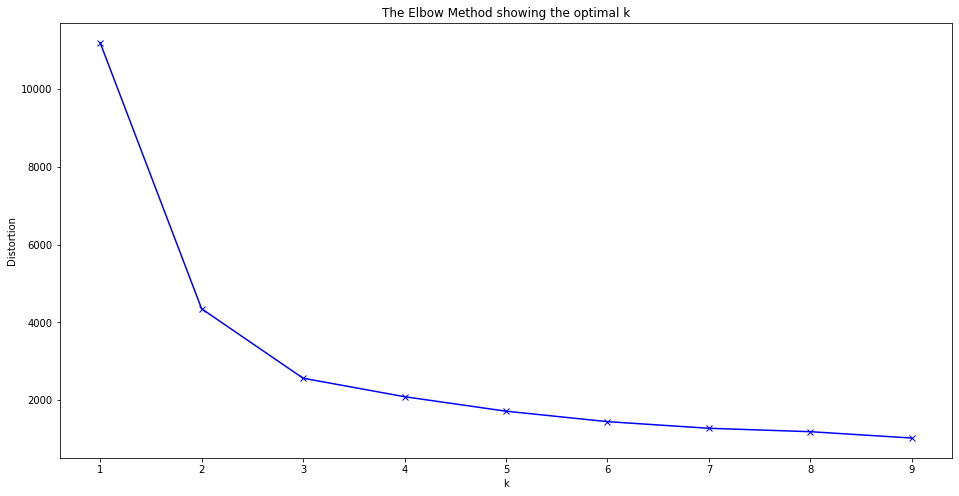

In [32]:
sg_grouped_clustering = sg_grouped.drop('Neighborhood', 1)

# run K-means with a range of k (elbow method)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(sg_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

# plot the distortions of K
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can observe that the 'elbow' is the number 3 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 3.

Run _k_-means to cluster the neighborhood into 3 clusters.


In [33]:
# define k
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sg_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 2, 1, 0, 1, 0, 2, 0, 2], dtype=int32)

Let's create a new dataframe that includes the cluster label and the top 3 restaurants for each neighbourhood.

In [34]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sg_merged = singapore_df

# add latitude/longitude for each neighborhood
sg_merged = sg_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# check the new dataframe 
sg_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Number of Thai Restaurant,Total Number of Restaurants
0,Raffles Place,1.28189,103.84912,Luke's Oyster Bar & Chop House,1.282459,103.847240,Seafood Restaurant,1,Japanese Restaurant,Korean Restaurant,Restaurant,1,76
1,Raffles Place,1.28189,103.84912,Grain Traders,1.281468,103.850039,Restaurant,1,Japanese Restaurant,Korean Restaurant,Restaurant,1,76
2,Raffles Place,1.28189,103.84912,Wang Dae Bak Korean BBQ,1.282901,103.848116,Korean Restaurant,1,Japanese Restaurant,Korean Restaurant,Restaurant,1,76
3,Raffles Place,1.28189,103.84912,Magal BBQ 마포갈매기,1.281299,103.847932,Korean Restaurant,1,Japanese Restaurant,Korean Restaurant,Restaurant,1,76
4,Raffles Place,1.28189,103.84912,왕대박 Wang Dae Bak Korean BBQ Restaurant,1.281345,103.847551,Korean Restaurant,1,Japanese Restaurant,Korean Restaurant,Restaurant,1,76


Check the number of values in each cluster.

In [35]:
sg_merged['Cluster Labels'].value_counts()

1    385
2    348
0    163
Name: Cluster Labels, dtype: int64

### Visualize clusters of neighborhoods

Finally, let's visualize the resulting clusters.

In [36]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sg_merged['Venue Latitude'], sg_merged['Venue Longitude'], sg_merged['Neighborhood'], sg_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

## 4. Result & Discussion

Based on the analysis, we have obtained 3 clusters of neighborhoods as followed.
* Cluster 1: Low-to-moderate demand & low supply and competition
* Cluster 2: Low-to-moderate demand & moderate-to-high supply and competition
* Cluster 3: Moderate-to-high demand & low-to-moderate supply and competition

Let's examine each of the 3 clusters in detail with a particular attention to the discriminating features that distinguish them.


#### **Cluster 1 (Red): Low-to-moderate demand & low supply and competition**


The first cluster is characterized by a low number of Thai restaurants. Only 5 out of the 34 neighborhoods in this cluster have a Thai restaurant and the number of restaurant is a neighborhood is only 1-2.

This is partly explained by the relatively low number of restaurants in these neighborhoods in general. The average number of restaurants in a neighborhood is only 5. Most of these neighborhoods are far from the city centers and leisure destinations such as Marina Bay, Clark Quay, and Orchard. So the demand and traffic of people are expected to be generally low.

There is nonetheless an exception. There are a few neighborhoods in this cluster that are very close to, if not in the middle of, city centers and leisure destinations such as Cairnhill neighborhood (Orchard) and River Valley neighborhood (Clark Quay). Furthermore, Farrer Park (Little India) turns out to have a moderately high number of restaurants, 11 to be exact, but no existing Thai restaurant is found.

In [37]:
print("Total number of neighborhoods: ", neighbor_df.loc[neighbor_df['Cluster Labels'] == 0].shape[0])
print("Average number of restaurants in a neighborhood: ", round(neighbor_df.loc[neighbor_df['Cluster Labels'] == 0]['Total Number of Restaurants'].mean()))

Total number of neighborhoods:  34
Average number of restaurants in a neighborhood:  10


In [38]:
neighbor_df.loc[neighbor_df['Cluster Labels'] == 0].sort_values(['Number of Thai Restaurant', 'Total Number of Restaurants'], ascending=False).reset_index(drop=True)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Number of Thai Restaurant,Total Number of Restaurants
0,0,Toa Payoh,Chinese Restaurant,Asian Restaurant,Thai Restaurant,2,22
1,0,Springleaf,Asian Restaurant,Thai Restaurant,Chinese Restaurant,2,20
2,0,Hougang,Chinese Restaurant,Fast Food Restaurant,Asian Restaurant,1,22
3,0,Choa Chu Kang,Fast Food Restaurant,Asian Restaurant,Thai Restaurant,1,12
4,0,Yishun,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,1,12
5,0,Farrer Park,Indian Restaurant,Seafood Restaurant,Asian Restaurant,0,22
6,0,Pasir Ris,Fast Food Restaurant,Asian Restaurant,Italian Restaurant,0,18
7,0,Queenstown,Asian Restaurant,Chinese Restaurant,Malay Restaurant,0,18
8,0,Bukit Merah,Chinese Restaurant,Seafood Restaurant,Asian Restaurant,0,18
9,0,Hillview,American Restaurant,Chinese Restaurant,Cantonese Restaurant,0,16


#### **Cluster 2 (Purple): Low-to-moderate demand & moderate-to-high supply and competition**


The second cluster is characterized by a low number of Thai restaurants with high number of restaurants in general. Out of 11 neighborhoods, 9 already have at least 1 Thai restaurants. In addition, half of them have 2 or more Thai restaurants in the neighborhood. In addition, these neighborhoods distinctively have a high number of restaurants in general with an average of 35 and it can go up to 47. This concentration is the highest among the three clusters. 

Looking at the map visualization, we can see that the neighborhoods in this cluster are closest to the most buzzling part of Singapore. For instance, Tanjong Pagar neighborhood (Chinatown), Raffle Place neighborhood (financial district), Habourfront (Sentosa Island), and Beach Road neighborhood (Marina Bay). Fierce competition among restaurants is expected, along with possibly the highest rental rate. 

Virtually all of these neighborhoods are in close proximity to Marina Bay, a must-see tourist attraction, as well as the financial districts of Singapore. Likewise, Haborfront neighborhood is the gateway to Sentosa Island, one of Asia's most famous casino destinations and family holiday spots.

In [39]:
print("Total number of neighborhoods: ", neighbor_df.loc[neighbor_df['Cluster Labels'] == 1].shape[0])
print("Average number of restaurants in a neighborhood: ", round(neighbor_df.loc[neighbor_df['Cluster Labels'] == 1]['Total Number of Restaurants'].mean()))

Total number of neighborhoods:  11
Average number of restaurants in a neighborhood:  70


In [40]:
neighbor_df.loc[neighbor_df['Cluster Labels'] == 1].sort_values(['Number of Thai Restaurant', 'Total Number of Restaurants'], ascending=False).reset_index(drop=True)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Number of Thai Restaurant,Total Number of Restaurants
0,1,Beach Road (part),Japanese Restaurant,Restaurant,Italian Restaurant,3,70
1,1,Bukit Timah,Chinese Restaurant,Korean Restaurant,Thai Restaurant,3,58
2,1,Novena,Japanese Restaurant,Italian Restaurant,Ramen Restaurant,2,56
3,1,Tiong Bahru,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,2,54
4,1,Tanjong Pagar,Korean Restaurant,Japanese Restaurant,Italian Restaurant,1,94
5,1,Jalan Besar,Chinese Restaurant,Asian Restaurant,Indian Restaurant,1,88
6,1,Raffles Place,Japanese Restaurant,Korean Restaurant,Restaurant,1,76
7,1,Joo Chiat,Asian Restaurant,Chinese Restaurant,Seafood Restaurant,1,64
8,1,Harbourfront,Fast Food Restaurant,Chinese Restaurant,Japanese Restaurant,1,60
9,1,Little India,Indian Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,0,80


#### **Cluster 3 (Green): Moderate-to-high demand & low-to-moderate supply and competition**

The third cluster is characterized by a moderate competition for restaurants in general with moderate-to-low competition for Thai restaurants. More than half have only 1 Thai restaurant or none. For a total of 19 neighborhoods, 7 do not have any Thai restaurant yet. Supply and competition of Thai restaurants in this cluster is moderate, if not low. An apparent outliner is Golden Miles neighborhood which is also known as 'Thai Town'.  

Demand for Thai food is expected to be high, extrapolating from the high number of restaurants in general as well as the concentration of Asian restaurants in many of these neighborhoods. This is explained by the fact that these neighborhoods are close to People's Park neighborhood and High Street neighborhood which are the spinal cord of Chinatown. A number of neighborhoods are also close to City Hall and Orchard which are the government and shopping district of Singapore espectively.

One neighborhood worthy of special attention is Clementi New Town. This neighborhood is in the vincity of a large university town of the National University of Singapore as well as well a high concentration of world's acclaimed higher education institutions like INSEAD, Duke (Asia campus), and Yale (Asia campus).

In [41]:
print("Total number of neighborhoods: ", neighbor_df.loc[neighbor_df['Cluster Labels'] == 2].shape[0])
print("Average number of restaurants in a neighborhood: ", round(neighbor_df.loc[neighbor_df['Cluster Labels'] == 2]['Total Number of Restaurants'].mean()))

Total number of neighborhoods:  19
Average number of restaurants in a neighborhood:  37


In [42]:
neighbor_df.loc[neighbor_df['Cluster Labels'] == 2].sort_values(['Number of Thai Restaurant', 'Total Number of Restaurants'], ascending=False).reset_index(drop=True)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Number of Thai Restaurant,Total Number of Restaurants
0,2,Golden Mile,Thai Restaurant,Italian Restaurant,Vietnamese Restaurant,5,46
1,2,Upper Thomson,Chinese Restaurant,Thai Restaurant,Indian Restaurant,3,34
2,2,Watten Estate,Asian Restaurant,Thai Restaurant,Malay Restaurant,3,30
3,2,Middle Road,Japanese Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,2,52
4,2,Lavender,Restaurant,Fast Food Restaurant,Italian Restaurant,2,40
5,2,Amber Road,Chinese Restaurant,Indian Restaurant,Japanese Restaurant,1,38
6,2,High Street,Italian Restaurant,French Restaurant,Asian Restaurant,1,38
7,2,Clementi New Town,Asian Restaurant,Chinese Restaurant,Dim Sum Restaurant,1,36
8,2,Woodlands,Japanese Restaurant,Asian Restaurant,Indian Restaurant,1,34
9,2,Bishan,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,1,28


## 5. Conclusion

The purpose of this notebook is to identify the best location for Lord Anantara's first Thai restaurant in Singapore.

The most strategic location for Lord Anatara is cluster 3 which display moderate-to-high demand & low-to-moderate supply and competition. Neighborhoods. One of the most promising location in this cluster is Clementi New Town which is in close proximity to many large and famous university campuses. Other attraction options are Anson (City Hall) and Orchard (Orchard) which boast the government and shopping districts of Singapore. Supply and competition of Thai restaurants in this cluster is moderate-to-low. This is a golden opportunity for Lord Anatana's! 

Another strategic location is cluster 2. While neighborhoods in this cluster generally have low traffic and demand for Thai food. A few neighborhoods are an exception. Neighborhood such as Cairnhill (Orchard), River Valley (Clark Quay), and Farrer Park (Little India) are very close to the city centers and leisure destinations and promise high traffic of customers. One indicator is the moderately high number of restaurants, 11 to be exact. Interestingly, no existing Thai restaurant is found. Lord Anatana's  restaurant will be the first!